In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
all_data = pd.read_csv('C:/Users/user/Downloads/forest_dataset.csv')
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [3]:
all_data.shape

(10000, 55)

In [4]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

In [5]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

In [6]:
# создание модели с указанием гиперпараметра C
clf = LogisticRegression(C=1)
# обучение модели
clf.fit(train_feature_matrix, train_labels)
# предсказание на тестовой выборке
y_pred = clf.predict(test_feature_matrix)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
accuracy_score(test_labels, y_pred)

0.6075

In [8]:
# заново создадим модель, указав солвер
clf = LogisticRegression(solver='saga')

# опишем сетку, по которой будем искать
param_grid = {
    'C': np.arange(1, 5), # также можно указать обычный массив, [1, 2, 3, 4]
    'penalty': ['l1', 'l2'],
}

# создадим объект GridSearchCV
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

# запустим поиск
search.fit(feature_matrix, labels)

# выведем наилучшие параметры
print(search.best_params_)

{'C': 3, 'penalty': 'l1'}


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [9]:
accuracy_score(labels, search.best_estimator_.predict(feature_matrix))

0.6419

## homework

In [10]:
df = pd.read_csv('C:/Users/user/Downloads/forest_dataset.csv')

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [12]:
df.info

<bound method DataFrame.info of          0    1   2    3   4     5    6    7    8     9  ...  45  46  47  48  \
0     2683  333  35   30  26  2743  121  173  179  6572  ...   0   0   0   0   
1     2915   90   8  216  11  4433  232  228  129  4019  ...   0   0   0   0   
2     2941  162   7  698  76  2783  227  242  148  1784  ...   0   0   0   0   
3     3096   60  17  170   3  3303  231  202   99  5370  ...   0   0   0   0   
4     2999   66   8  488  37  1532  228  225  131  2290  ...   0   0   0   0   
...    ...  ...  ..  ...  ..   ...  ...  ...  ...   ...  ...  ..  ..  ..  ..   
9995  3088  217  21  295  53  2912  194  254  190  1590  ...   0   0   0   0   
9996  2569  129  10    0   0  1273  237  234  127  5094  ...   0   0   0   0   
9997  2693   21  11   30   6  2316  212  216  139  2110  ...   0   0   0   0   
9998  2536   42  11  277  19   323  222  216  128  2844  ...   0   0   0   0   
9999  3109  261  10  234  -8  2451  195  246  189  1853  ...   0   0   0   0   

      4

In [13]:
labels

array([2, 1, 2, ..., 2, 2, 2], dtype=int64)

In [14]:
feature_matrix

array([[2683,  333,   35, ...,    0,    0,    0],
       [2915,   90,    8, ...,    0,    0,    0],
       [2941,  162,    7, ...,    0,    0,    0],
       ...,
       [2693,   21,   11, ...,    0,    0,    0],
       [2536,   42,   11, ...,    0,    0,    0],
       [3109,  261,   10, ...,    0,    0,    0]], dtype=int64)

In [15]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix, labels, test_size = 0.3, random_state=3)

In [16]:
first_tree = DecisionTreeClassifier(random_state=3)

In [17]:
first_tree.fit(train_feature_matrix, train_labels)

DecisionTreeClassifier(random_state=3)

In [18]:
test_predict = first_tree.predict(test_feature_matrix)

In [19]:
accuracy_score(test_labels, test_predict)

0.713

In [20]:
first_tree.get_depth()

32

In [21]:
first_knn = KNeighborsClassifier()

In [22]:
first_knn.fit(train_feature_matrix, train_labels)

KNeighborsClassifier()

In [23]:
test_predict_knn = first_knn.predict(test_feature_matrix)

In [24]:
accuracy_score(test_labels, test_predict_knn)

0.7373333333333333

##  params

In [25]:
tree_params = {'max_depth':[10,12,15,17,19], 'max_features':[0.3, 0.5, 0.7, 0.8, 1]}

In [26]:
tree_grid = GridSearchCV(first_tree, tree_params, cv = 5, n_jobs=-1)

In [27]:
%%time
tree_grid.fit(train_feature_matrix, train_labels)

CPU times: total: 406 ms
Wall time: 1.81 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 15, 17, 19],
                         'max_features': [0.3, 0.5, 0.7, 0.8, 1]})

In [28]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 15, 'max_features': 0.7}, 0.7157142857142857)

In [29]:
second_tree = DecisionTreeClassifier(max_depth=10, max_features=0.5).fit(train_feature_matrix, train_labels)

In [30]:
test_predict_tree2 = second_tree.predict(test_feature_matrix)

In [31]:
accuracy_score(test_predict_tree2, test_labels)

0.7206666666666667

In [32]:
feature_matrix

array([[2683,  333,   35, ...,    0,    0,    0],
       [2915,   90,    8, ...,    0,    0,    0],
       [2941,  162,    7, ...,    0,    0,    0],
       ...,
       [2693,   21,   11, ...,    0,    0,    0],
       [2536,   42,   11, ...,    0,    0,    0],
       [3109,  261,   10, ...,    0,    0,    0]], dtype=int64)

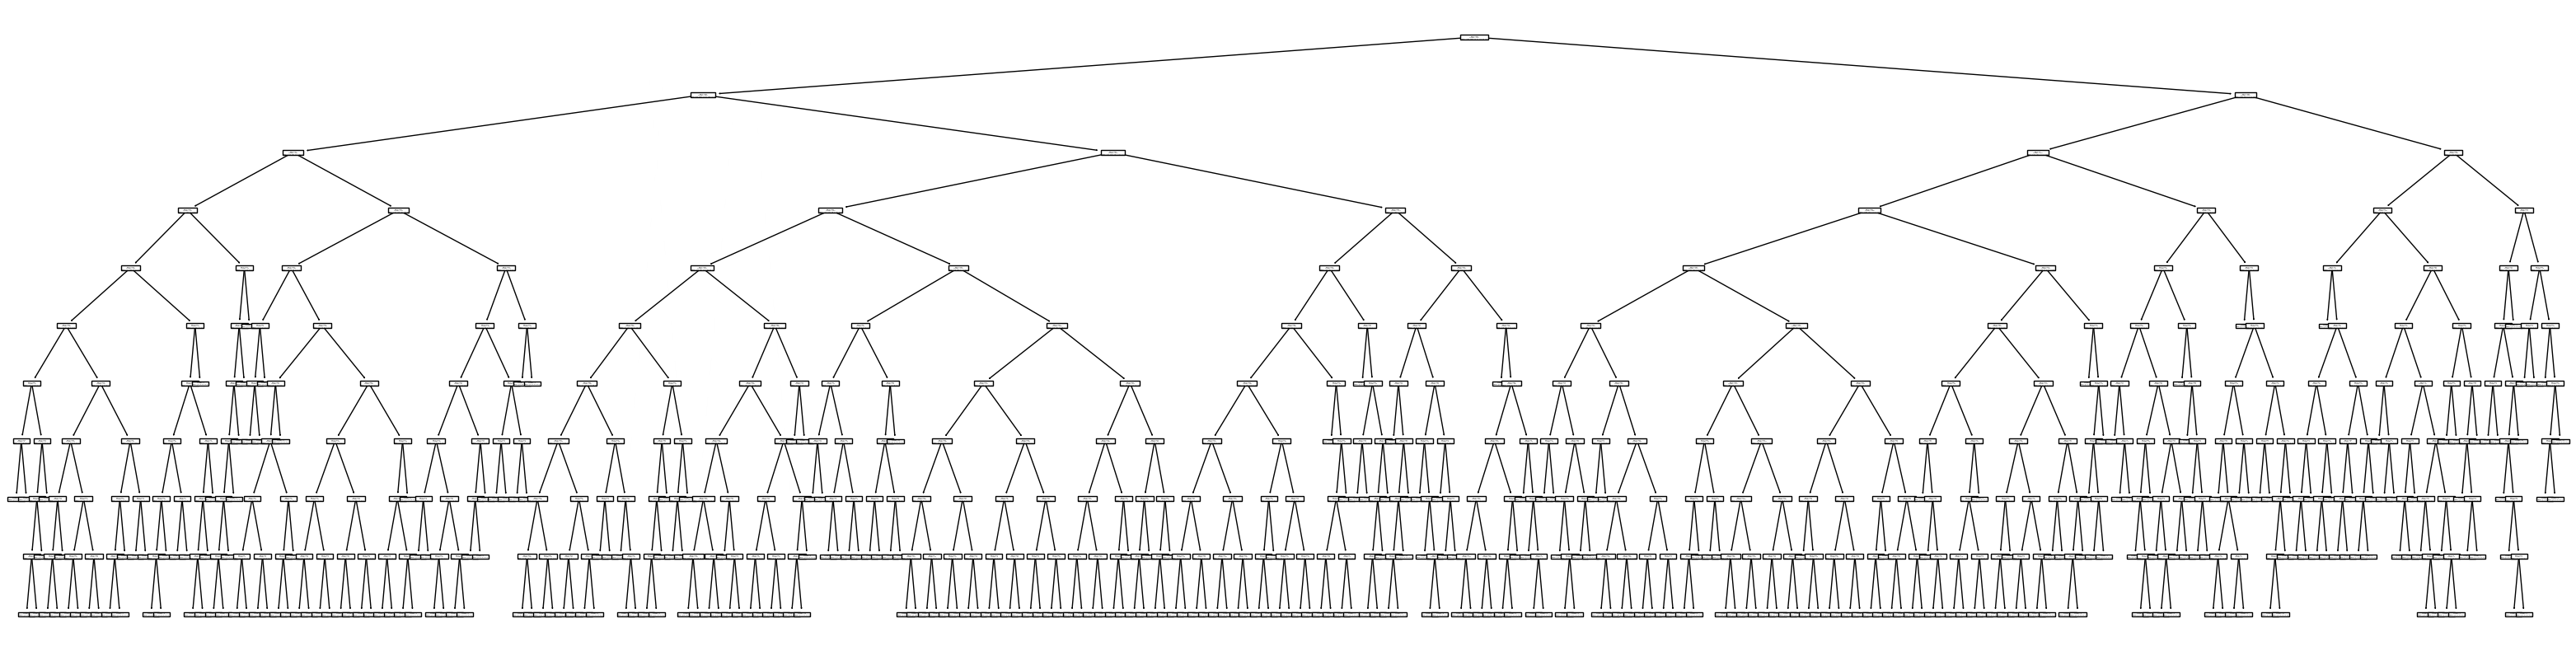

In [33]:
plt.figure(figsize=(40,10))
plot_tree(second_tree, feature_names=df.drop('54', axis=1).columns.tolist())
plt.show()

In [35]:
accuracy_score(test_labels, test_predict_knn)

0.7373333333333333

In [36]:
# Создание модели KNeighborsClassifier
knn = KNeighborsClassifier()

# Определение гиперпараметров, по которым нужно искать оптимальные значения
param_grid = {
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], # значения параметра n_neighbors
    'weights': ['uniform', 'distance']
}

# Использование GridSearchCV для поиска оптимальных значений гиперпараметров
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(train_feature_matrix, train_labels)

# Получение оптимальной модели с найденными оптимальными гиперпараметрами
optimal_clf = grid_search.best_estimator_

# Обучение оптимальной модели на тренировочных данных
optimal_clf.fit(train_feature_matrix, train_labels)

# Вычисление вероятностей принадлежности к классам для тестовой выборки
predict_prob = optimal_clf.predict_proba(test_feature_matrix)

In [44]:
print(grid_search.best_params_, grid_search.best_score_)

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'} 0.7547142857142857


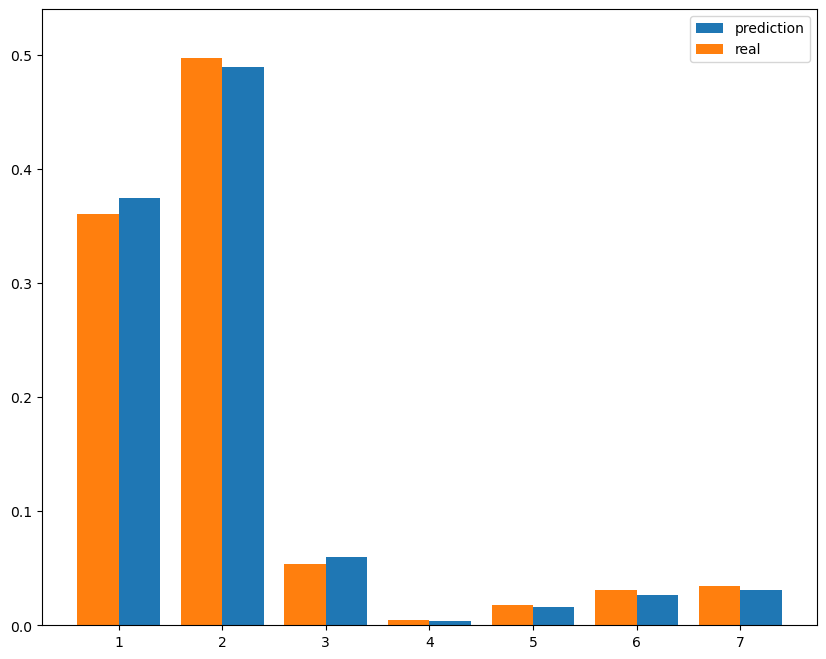

In [38]:
unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels), freq))

pred_freq = predict_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

In [39]:
class_number = 3
probability = round(pred_freq[class_number-1], 2)
print("Прогнозируемая вероятность класса {}: {}".format(class_number, probability))

Прогнозируемая вероятность класса 3: 0.06
